In [1]:
import networkx as nx  

import sys
import os
from dotenv import load_dotenv
project_dir = os.getenv("PROJECT_PATH")

sys.path.insert(2, project_dir + '/')
sys.path.insert(2, project_dir + '/utils/')
sys.path.insert(3, project_dir + '/utils/neo4j/')

import graph as graph
import query as query
from connection import Neo4jConnection

#Use local DB
conn = Neo4jConnection(uri="bolt://localhost:7687", 
                    user="neo4j",              
                    pwd="neo4jneo4j")

graph_name = 'MyGraph-undirected'

#NATURAL, REVERSE, UNDIRECTED

graph.create_graph(conn,graph_name,db='sk2',orientation="UNDIRECTED")

Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.graph.drop`: Caused by: java.util.NoSuchElementException: Graph with name `MyGraph-undirected` does not exist on database `neo4j`. It might exist on another database.}
Query failed: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.graph.project`: Caused by: java.lang.IllegalArgumentException: A graph with name 'MyGraph-undirected' already exists.}


In [2]:
graph.get_degree(conn,graph_name,db='sk2').head(3)

,name,weightedFollowers
0,Data Engineer,2890.384615
1,Data Scientist,2171.764706
2,Data Analyst,1866.666667


In [3]:
graph.get_closeness(conn,graph_name,db='sk2').head(10)

,name,score
0,Data Engineer,0.582749
1,Data Analyst,0.515007
2,xml,0.500695
3,word,0.500695
4,windows,0.500695
5,web services,0.500695
6,web applications,0.500695
7,waterfall,0.500695
8,visualizations,0.500695
9,visualization,0.500695


In [4]:
graph.get_betweenness(conn,graph_name,db='sk2').head(10)

,name,score
0,Data Engineer,310513.670177
1,Data Analyst,227778.525237
2,Data Scientist,206299.804586
3,user acceptance testing,500.736077
4,use cases,500.736077
5,statistical analysis,500.736077
6,shell,500.736077
7,research,500.736077
8,quality assurance,500.736077
9,prototyping,500.736077


In [5]:
graph.get_eigenvector(conn,graph_name,db='sk2').head(6)

,name,score
0,Data Engineer,0.705505
1,Data Scientist,0.530096
2,Data Analyst,0.455630
3,sql,0.037274
4,python,0.034598
5,data analysis,0.026383


In [2]:
graph.get_louvain(conn,graph_name,db='sk2').head(100)

,name,communityId
0,functiona requirements,7
1,business process modeling,10
2,data-driven decision-making,14
3,social media marketing,15
4,threat detection measures,18
...,...,...
95,jdbc,231
96,oracle peoplesoft,232
97,e-commerce,234
98,soap ui,236


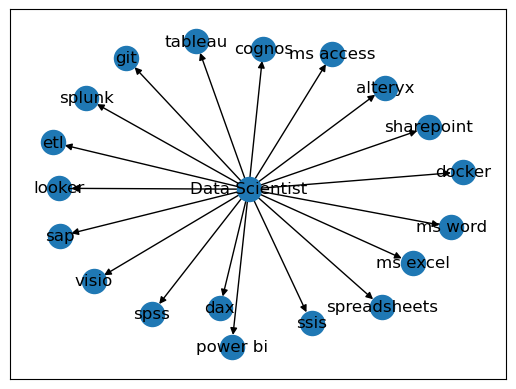

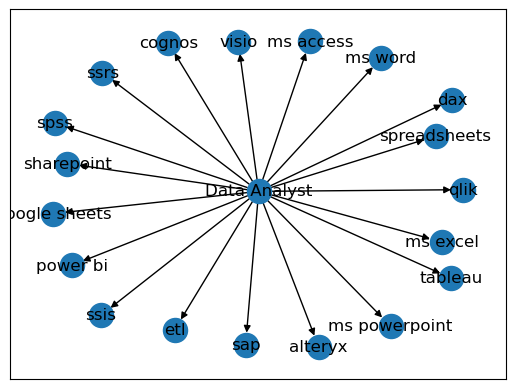

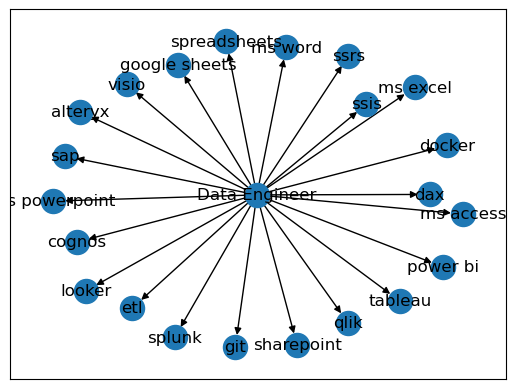

In [7]:
import matplotlib.pyplot as plt

def show_graph(graph):
   
    G = nx.MultiDiGraph()
    nodes = list(graph._nodes.values())
    for node in nodes:    
        G.add_node(node._properties["name"], labels=node._labels, properties=node._properties)
    rels = list(graph._relationships.values())
    for rel in rels:   
        G.add_edge(rel.start_node._properties["name"], rel.end_node._properties["name"], key=rel.element_id, type=rel.type, properties=rel._properties)
  
    nx.draw_networkx(G,with_labels=True)
    plt.show()


show_graph(query.get_all_for_graph(conn,"Data Scientist",db='sk2'))
show_graph(query.get_all_for_graph(conn,"Data Analyst",db='sk2'))
show_graph(query.get_all_for_graph(conn,"Data Engineer",db='sk2'))